## Get NBA Data

In [2]:
import requests
import pandas as pd
import time

headers = { 'Host': 'stats.nba.com', \
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36', \
           'Accept': '*/*', \
            'Accept-Language': 'en-US,en;q=0.9', 'Accept-Encoding': 'gzip, deflate, br, zstd', \
            'Referer': 'https://nba.com/', 'Origin': 'https://nba.com', \
            'x-nba-stats-origin': 'stats', 'x-nba-stats-token': 'true',\
            'DNT': '1', }

def fetch_data(start_year,end_year,type):
    # Define a dictionary mapping data types to their respective urls
    fetching_urls = {
        "player": 'https://stats.nba.com/stats/leagueLeaders?' + \
            'LeagueID=' + '00' + '&PerMode=' + 'PerGame' + '&Scope=' + 'S' + \
            '&SeasonType=' + 'Regular Season' + '&StatCategory=' + 'PTS' + \
            '&Season=',
        "team_advanced": 'https://stats.nba.com/stats/leaguedashteamstats?' + \
            'Conference=' + '&DateFrom=' + '&DateTo=' + '&Division=' \
            '&GameScope=' + '&GameSegment=' + '&Height=' + \
            '&ISTRound=' + '&LastNGames=0' + '&LeagueID=00' + '&Location=' + \
            '&MeasureType=Advanced' + '&Month=0' + '&OpponentTeamID=0' + \
            '&Outcome=' + '&PORound=0' + '&PaceAdjust=N' + '&PerMode=PerGame' + \
            '&Period=0' + '&PlayerExperience=' + '&PlayerPosition=' + '&PlusMinus=N' + \
            '&Rank=N' + '&SeasonSegment=' + \
            '&SeasonType=Regular Season' + '&ShotClockRange=' + '&StarterBench=' + \
            '&TeamID=0' + '&TwoWay=0' + '&VsConference=' + '&VsDivision=' + \
            '&Season=',
        "team_base": 'https://stats.nba.com/stats/leaguedashteamstats?' + \
            'Conference=' + '&DateFrom=' + '&DateTo=' + '&Division=' \
            '&GameScope=' + '&GameSegment=' + '&Height=' + \
            '&ISTRound=' + '&LastNGames=0' + '&LeagueID=00' + '&Location=' + \
            '&MeasureType=Base' + '&Month=0' + '&OpponentTeamID=0' + \
            '&Outcome=' + '&PORound=0' + '&PaceAdjust=N' + '&PerMode=PerGame' + \
            '&Period=0' + '&PlayerExperience=' + '&PlayerPosition=' + '&PlusMinus=N' + \
            '&Rank=N' + '&SeasonSegment=' + \
            '&SeasonType=Regular Season' + '&ShotClockRange=' + '&StarterBench=' + \
            '&TeamID=0' + '&TwoWay=0' + '&VsConference=' + '&VsDivision=' + \
            '&Season=',
        "team_misc": 'https://stats.nba.com/stats/leaguedashteamstats?' + \
            'Conference=' + '&DateFrom=' + '&DateTo=' + '&Division=' \
            '&GameScope=' + '&GameSegment=' + '&Height=' + \
            '&ISTRound=' + '&LastNGames=0' + '&LeagueID=00' + '&Location=' + \
            '&MeasureType=Misc' + '&Month=0' + '&OpponentTeamID=0' + \
            '&Outcome=' + '&PORound=0' + '&PaceAdjust=N' + '&PerMode=PerGame' + \
            '&Period=0' + '&PlayerExperience=' + '&PlayerPosition=' + '&PlusMinus=N' + \
            '&Rank=N' + '&SeasonSegment=' + \
            '&SeasonType=Regular Season' + '&ShotClockRange=' + '&StarterBench=' + \
            '&TeamID=0' + '&TwoWay=0' + '&VsConference=' + '&VsDivision=' + \
            '&Season=',
        "bio": 'https://stats.nba.com/stats/leaguedashplayerbiostats?' + \
            'College=' + '&Conference=' + '&Country=' + '&DateFrom=' + '&DateTo=' + \
            '&Division=' + '&DraftPick=' + '&DraftYear=' + '&GameScope=' + \
            '&GameSegment=' + '&Height=' + '&ISTRound=' + '&LastNGames=0' + \
            '&LeagueID=00' + '&Location=' + '&Month=0' + '&OpponentTeamID=0' + \
            '&Outcome=' + '&PORound=0' + '&PerMode=PerGame' + '&Period=0' + \
            '&PlayerExperience=' + '&PlayerPosition=' + \
            '&SeasonSegment=' + '&SeasonType=Regular Season' + '&ShotClockRange=' + \
            '&StarterBench=' + '&TeamID=0' + '&VsConference=' + '&VsDivision=' + \
            '&Weight=' + '&Season=',
        "team_performance": 'https://stats.nba.com/stats/playoffpicture?' + \
            'LeagueID=00' + '&SeasonID=',
        "team_rank": 'https://stats.nba.com/stats/leaguestandingsv3?GroupBy=conf' + \
            '&LeagueID=00&SeasonType=Regular%20Season&Section=overall&Season='
    }

    # Get the fetching url based on the type argument
    fetch_url = fetching_urls.get(type)
    if not fetch_url:
        raise ValueError(f"Invalid type of data specified: {type}")

    # Generate a list of seasons from 2002-03 to 2022-23
    if type == 'team_performance':
        seasons = [f"2{year}" for year in range(start_year, end_year)] 
    else:
        seasons = [f"{year}-{str(year+1)[-2:]:0>2}" for year in range(start_year, end_year)]

    # List to hold DataFrames for each season
    dfs = []

    # Fetch data for each season and append to the list
    for season in seasons:     
        try:
            response = requests.get(fetch_url+season, headers=headers)
            response.raise_for_status()  # Check for HTTP request errors
            data = response.json()
            if type == 'player':
                df = pd.DataFrame(data['resultSet']['rowSet'], columns=data['resultSet']['headers'])
            elif type == 'team_performance':
                df = pd.DataFrame(data['resultSets'][2]['rowSet'], columns=data['resultSets'][2]['headers'])
                df2 = pd.DataFrame(data['resultSets'][3]['rowSet'], columns=data['resultSets'][3]['headers'])
                dfs.append(df2)
            else:
                df = pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
    
            df['Season'] = season  # Add a column for the season
            dfs.append(df)
            time.sleep(.5)  # Sleep to avoid hitting the server too hard
            print(f"Successfully fetched {type} data for season {season}")
        except Exception as e:
            print(f"Failed to fetch {type} data for season {season}: {e}")
    
    return dfs

ModuleNotFoundError: No module named 'pandas'

## Get Data

In [ ]:
#Get player performance data
#uncomment to fetch data from API
#player_data_df = pd.concat(fetch_data(2002, 2022, "player"))
#uncomment to write data to file
#player_data_df.to_csv('nba_player_stats.csv', index=False)

#Get player bio data
#uncomment to fetch data from API
#player_bio_data_df = pd.concat(fetch_data(2002, 2022, "bio"))
#uncomment to write data to file
#player_bio_data_df.to_csv('nba_playerbio.csv', index=False)

#Get team data
#uncomment to fetch data from API
#team_adv_data_df = pd.concat(fetch_data(2002, 2022, "team_advanced"))
#uncomment to write data to file
#team_adv_data_df.to_csv('nba_team_adv.csv', index=False)
#uncomment to fetch data from API
#team_base_data_df = pd.concat(fetch_data(2002, 2022, "team_base"))
#uncomment to write data to file
#team_base_data_df.to_csv('nba_team_base.csv', index=False)
#uncomment to fetch data from API
#team_misc_data_df = pd.concat(fetch_data(2002, 2022, "team_misc"))
#uncomment to write data to file
#team_misc_data_df.to_csv('nba_team_misc.csv', index=False)

#Get team data
#uncomment to fetch data from API
#team_data_df = pd.concat(fetch_data(2002, 2022, "team_performance"))
#uncomment to write data to file
#team_data_df.to_csv('nba_team_stats.csv', index=False)

#Get team rank
#uncomment to fetch data from API
#team_rank_df = pd.concat(fetch_data(2002, 2022, "team_rank"))
#uncomment to write data to file
#team_rank_df.to_csv('nba_team_rank.csv', index=False)

Successfully fetched team_advanced data for season 2002-03
Successfully fetched team_advanced data for season 2003-04
Successfully fetched team_advanced data for season 2004-05
Successfully fetched team_advanced data for season 2005-06
Successfully fetched team_advanced data for season 2006-07
Successfully fetched team_advanced data for season 2007-08
Successfully fetched team_advanced data for season 2008-09
Successfully fetched team_advanced data for season 2009-10
Successfully fetched team_advanced data for season 2010-11
Successfully fetched team_advanced data for season 2011-12
Successfully fetched team_advanced data for season 2012-13
Successfully fetched team_advanced data for season 2013-14
Successfully fetched team_advanced data for season 2014-15
Successfully fetched team_advanced data for season 2015-16
Successfully fetched team_advanced data for season 2016-17
Successfully fetched team_advanced data for season 2017-18
Successfully fetched team_advanced data for season 2018-

## Question 1

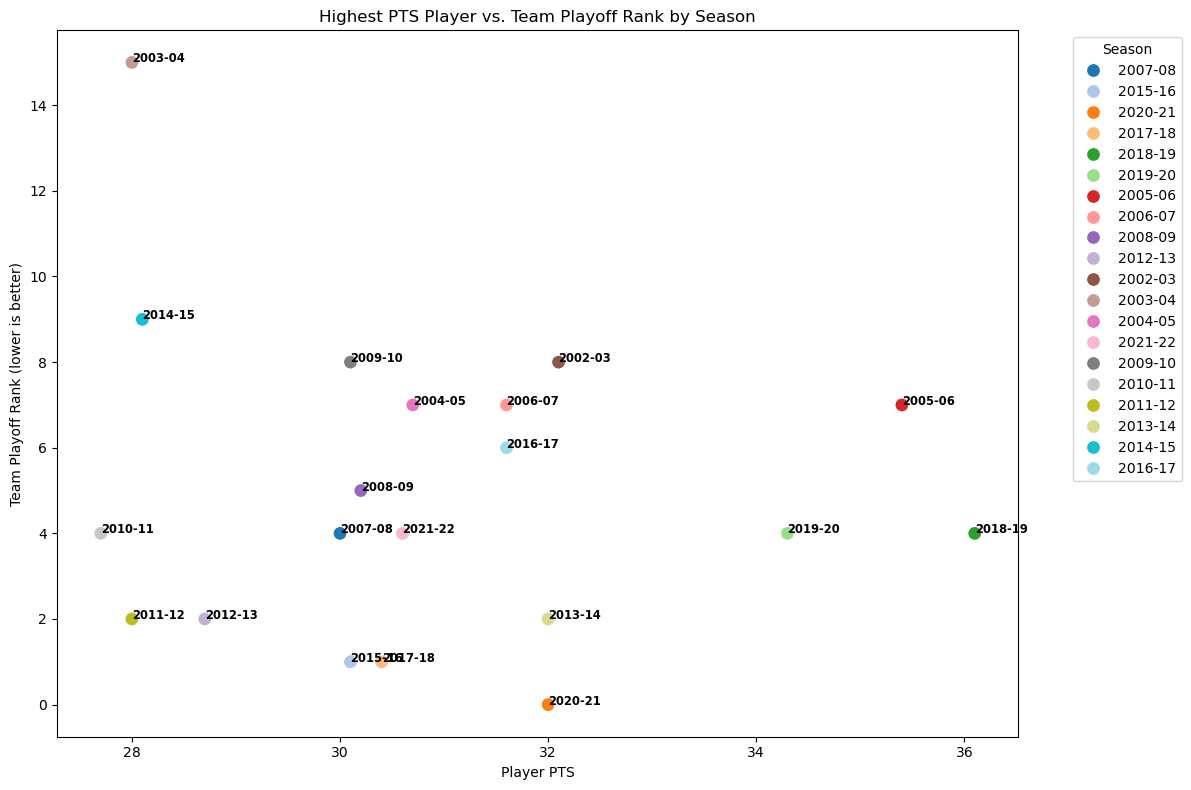

                  PTS       AST       REB       STL       BLK  PlayoffRank
PTS          1.000000  0.258312 -0.119602  0.279441 -0.141479    -0.131270
AST          0.258312  1.000000 -0.065719  0.706392 -0.336208     0.036681
REB         -0.119602 -0.065719  1.000000 -0.446432  0.460501    -0.040657
STL          0.279441  0.706392 -0.446432  1.000000 -0.259151     0.172337
BLK         -0.141479 -0.336208  0.460501 -0.259151  1.000000    -0.069913
PlayoffRank -0.131270  0.036681 -0.040657  0.172337 -0.069913     1.000000

                            OLS Regression Results                            
Dep. Variable:            PlayoffRank   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.219
Method:                 Least Squares   F-statistic:                    0.3172
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.894
Time:                        05:16:35   Log-Likelihood:                -51.987


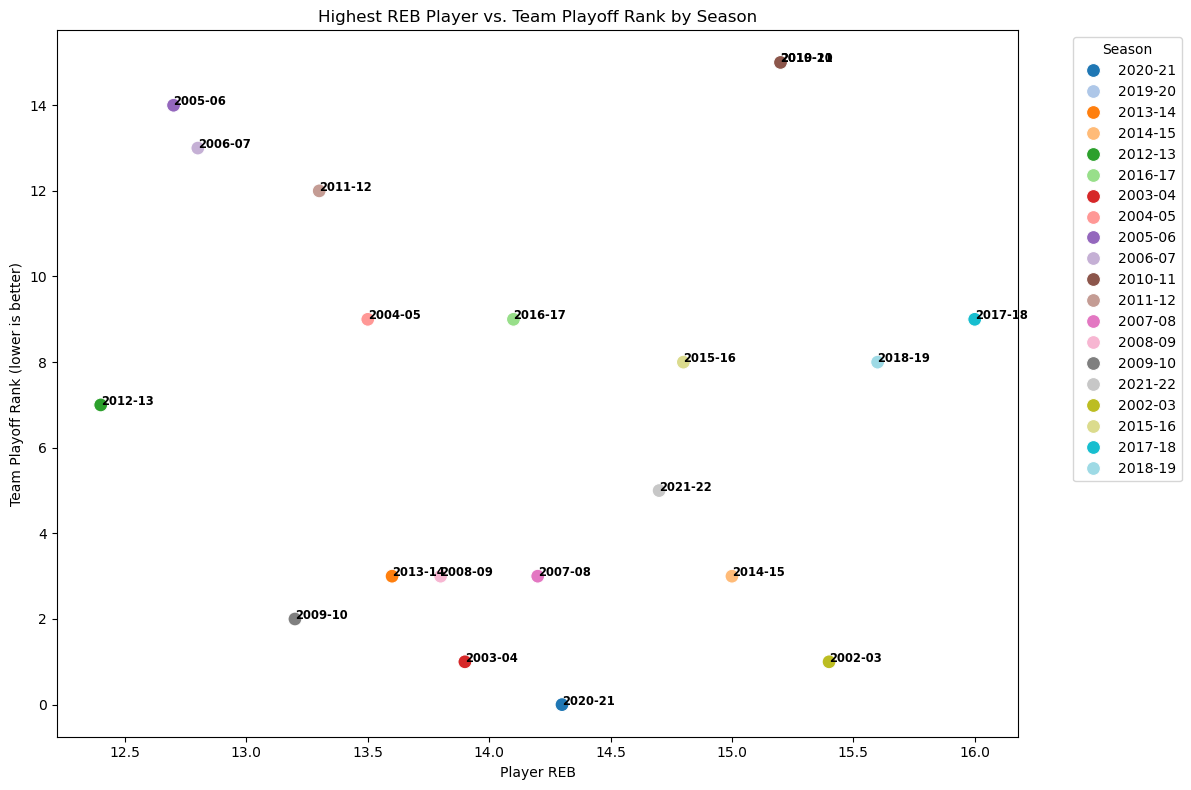

                  PTS       AST       REB       STL       BLK  PlayoffRank
PTS          1.000000  0.575110 -0.480658  0.010850 -0.538252     0.435734
AST          0.575110  1.000000 -0.267237  0.464097 -0.311975     0.370112
REB         -0.480658 -0.267237  1.000000  0.230158 -0.074200    -0.048364
STL          0.010850  0.464097  0.230158  1.000000 -0.025924     0.236213
BLK         -0.538252 -0.311975 -0.074200 -0.025924  1.000000    -0.769951
PlayoffRank  0.435734  0.370112 -0.048364  0.236213 -0.769951     1.000000

                            OLS Regression Results                            
Dep. Variable:            PlayoffRank   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     5.806
Date:                Wed, 13 Mar 2024   Prob (F-statistic):            0.00416
Time:                        05:16:35   Log-Likelihood:                -48.635


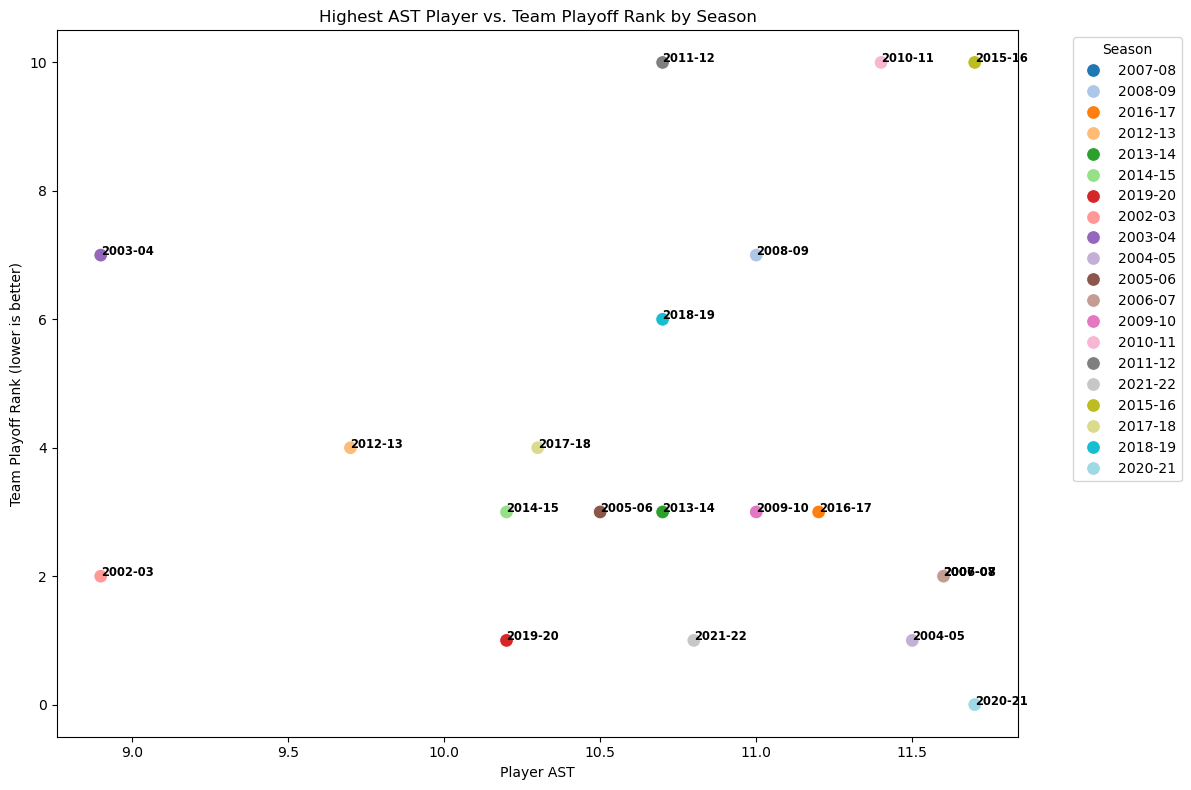

                  PTS       AST       REB       STL       BLK  PlayoffRank
PTS          1.000000 -0.119356  0.641580  0.249805  0.672209    -0.387155
AST         -0.119356  1.000000  0.067188 -0.212162 -0.092003     0.007346
REB          0.641580  0.067188  1.000000  0.186449  0.816832    -0.198144
STL          0.249805 -0.212162  0.186449  1.000000  0.008770    -0.080610
BLK          0.672209 -0.092003  0.816832  0.008770  1.000000    -0.373011
PlayoffRank -0.387155  0.007346 -0.198144 -0.080610 -0.373011     1.000000

                            OLS Regression Results                            
Dep. Variable:            PlayoffRank   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.9397
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.485
Time:                        05:16:36   Log-Likelihood:                -47.987


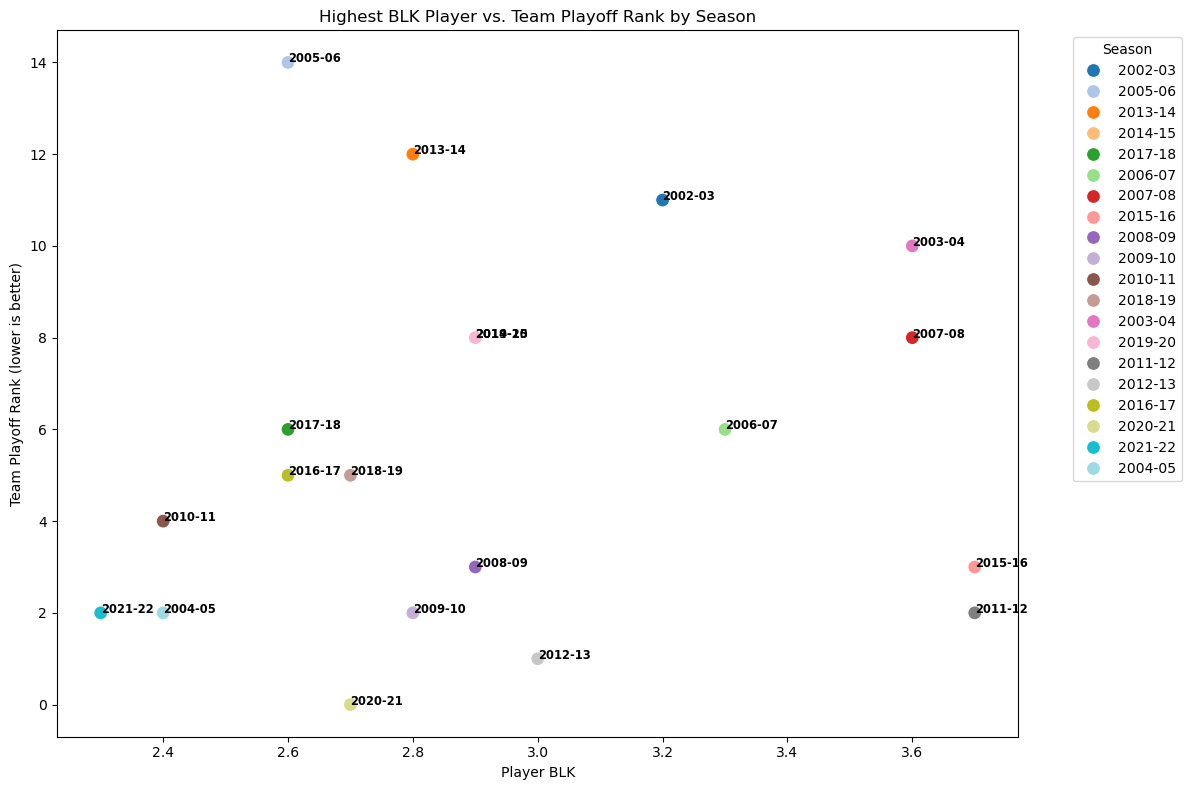

                  PTS       AST       REB       STL       BLK  PlayoffRank
PTS          1.000000  0.147642  0.336943  0.571763 -0.480796    -0.077444
AST          0.147642  1.000000  0.270915  0.630124 -0.124870     0.336765
REB          0.336943  0.270915  1.000000  0.264236 -0.094613    -0.292017
STL          0.571763  0.630124  0.264236  1.000000 -0.368682     0.142848
BLK         -0.480796 -0.124870 -0.094613 -0.368682  1.000000     0.131278
PlayoffRank -0.077444  0.336765 -0.292017  0.142848  0.131278     1.000000

                            OLS Regression Results                            
Dep. Variable:            PlayoffRank   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.205
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.357
Time:                        05:16:36   Log-Likelihood:                -51.840


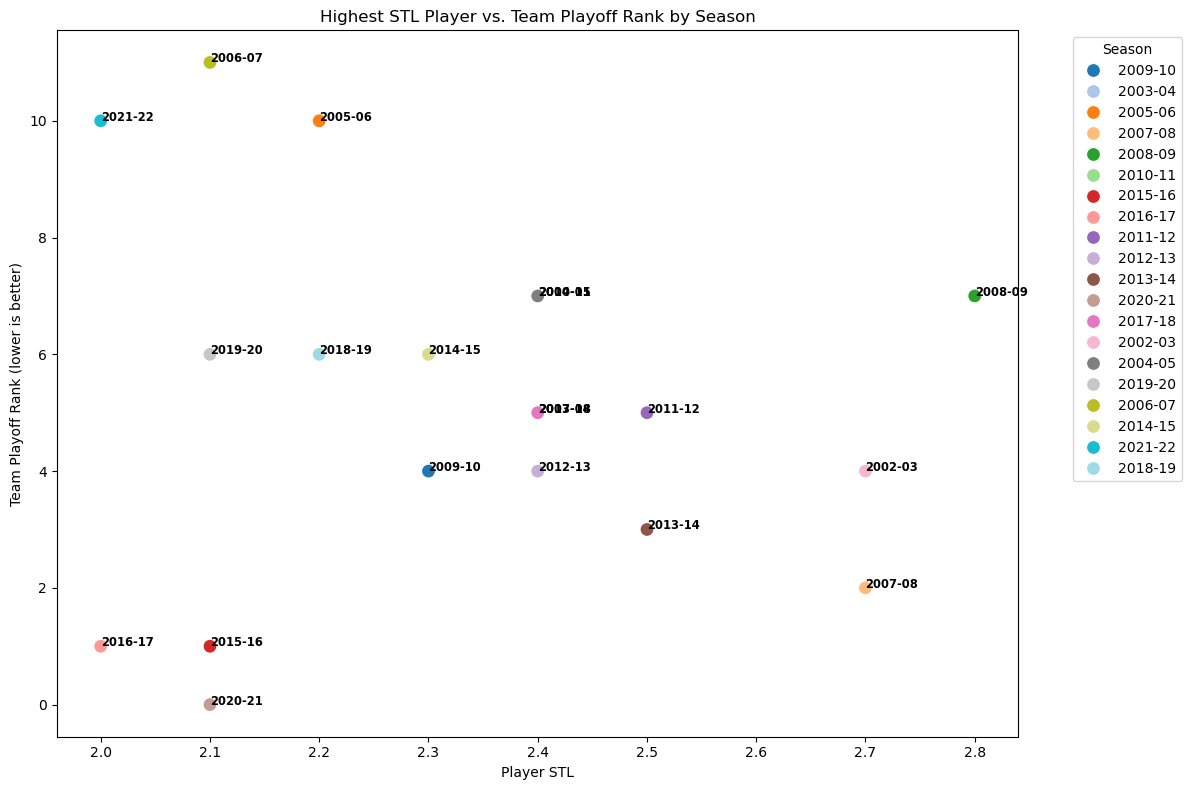

                  PTS       AST       REB       STL       BLK  PlayoffRank
PTS          1.000000 -0.191678 -0.142328  0.250380 -0.360755    -0.039473
AST         -0.191678  1.000000 -0.461140  0.392415 -0.580741    -0.164866
REB         -0.142328 -0.461140  1.000000 -0.695492  0.628250     0.145041
STL          0.250380  0.392415 -0.695492  1.000000 -0.487915    -0.098258
BLK         -0.360755 -0.580741  0.628250 -0.487915  1.000000    -0.110443
PlayoffRank -0.039473 -0.164866  0.145041 -0.098258 -0.110443     1.000000

                            OLS Regression Results                            
Dep. Variable:            PlayoffRank   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.8609
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.531
Time:                        05:16:36   Log-Likelihood:                -47.285


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def convert_season_id(season_id):
    season_str = str(season_id)
    start_year = int(season_str[1:])
    end_year = start_year + 1
    end_year_short = str(end_year)[2:]
    formatted_season = f"{start_year}-{end_year_short}"
    return formatted_season

# Convert the 'SeasonID' column to Season
team_rank_df['Season'] = team_rank_df['SeasonID'].apply(convert_season_id)

team_rank_df.rename(columns={'TeamID': 'TEAM_ID'}, inplace=True)

# Set 'TeamID' and 'Season' as the index for both DataFrames
player_data_df.set_index(['TEAM_ID', 'Season'], inplace=True)
team_rank_df.set_index(['TEAM_ID', 'Season'], inplace=True)

# Join the dataframes based on the indices
combined_df = player_data_df.join(team_rank_df, how='inner')

# Reset the index if you want to turn the indices back into columns
#print(combined_df.head())
#print(player_data_df.head())
#print(team_rank_df.head())
combined_df.reset_index(inplace=True)
player_data_df.reset_index(inplace=True)
team_rank_df.reset_index(inplace=True)

def analyze_top_players_vs_team_success(dataframe, attribute):
    # Find the index of the maximum value of the specified attribute in each season
    idx = dataframe.groupby(['Season'])[attribute].transform('max') == dataframe[attribute]

    # Filter the DataFrame using the idx boolean series
    top_players_df = dataframe[idx].copy()

    # Drop duplicates in case there are players with the same max attribute value in a season
    top_players_df = top_players_df.drop_duplicates(subset=['Season'])

    # Plotting the scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=top_players_df, x=attribute, y='PlayoffRank', hue='Season', palette='tab20', s=100)
    
    # Adding text annotations
    for index, row in top_players_df.iterrows():
        plt.text(row[attribute], row['PlayoffRank'], row['Season'],
                 horizontalalignment='left', size='small', color='black', weight='semibold')
    
    plt.title(f'Highest {attribute} Player vs. Team Playoff Rank by Season')
    plt.xlabel(f'Player {attribute}')
    plt.ylabel('Team Playoff Rank (lower is better)')
    plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    attributes = ['PTS', 'AST', 'REB', 'STL', 'BLK']
    print(top_players_df[attributes + ['PlayoffRank']].corr())
    print()

    # Regression analysis
    X = top_players_df[attributes]  # Predictor variable
    y = top_players_df['PlayoffRank']  # Response variable
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    model = sm.OLS(y, X).fit()
    print(model.summary())
    print()

analyze_top_players_vs_team_success(combined_df, 'PTS')
analyze_top_players_vs_team_success(combined_df, 'REB')
analyze_top_players_vs_team_success(combined_df, 'AST')
analyze_top_players_vs_team_success(combined_df, 'BLK')
analyze_top_players_vs_team_success(combined_df, 'STL')



## Question 2

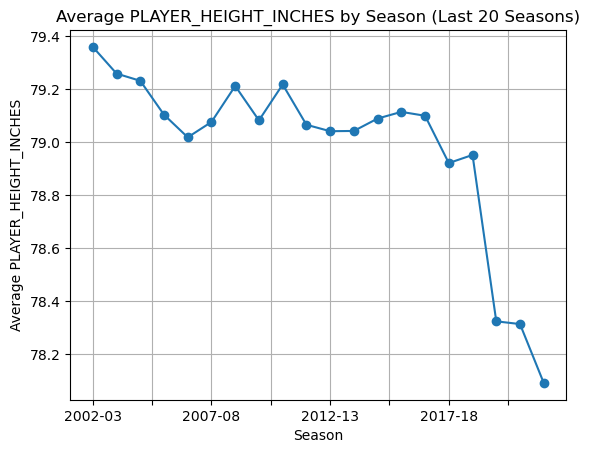

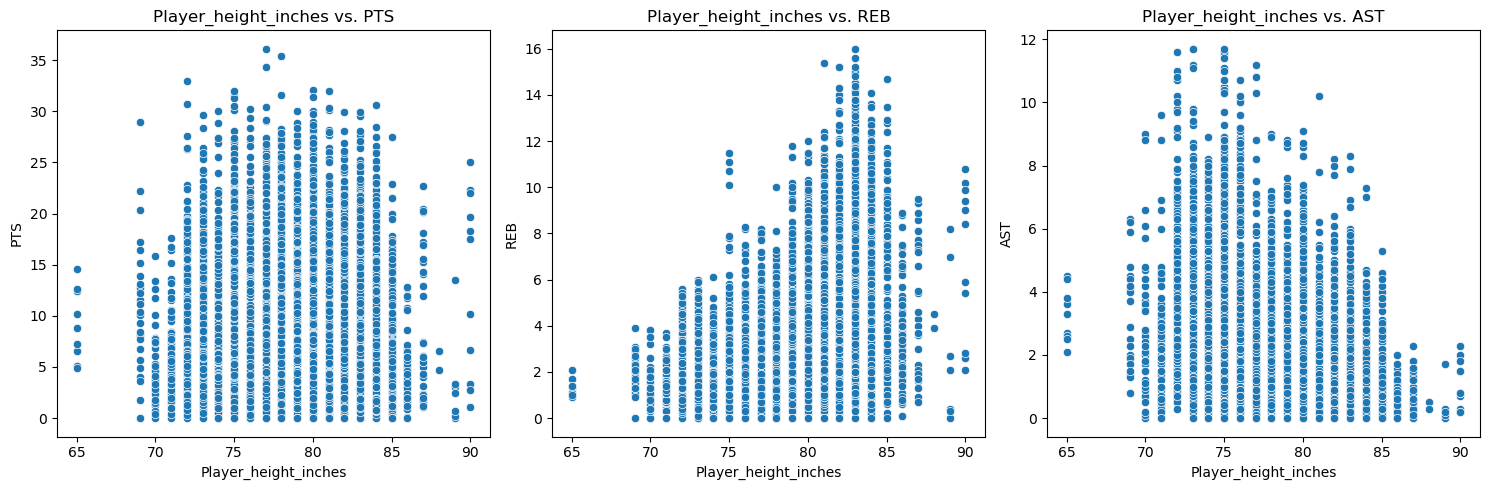

                           PTS       REB       AST
PTS                   1.000000  0.621613  0.671327
REB                   0.621613  1.000000  0.252214
AST                   0.671327  0.252214  1.000000
PLAYER_HEIGHT_INCHES -0.063033  0.427472 -0.435674


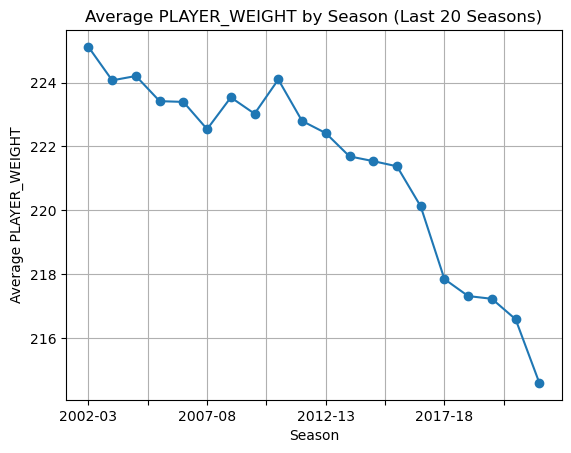

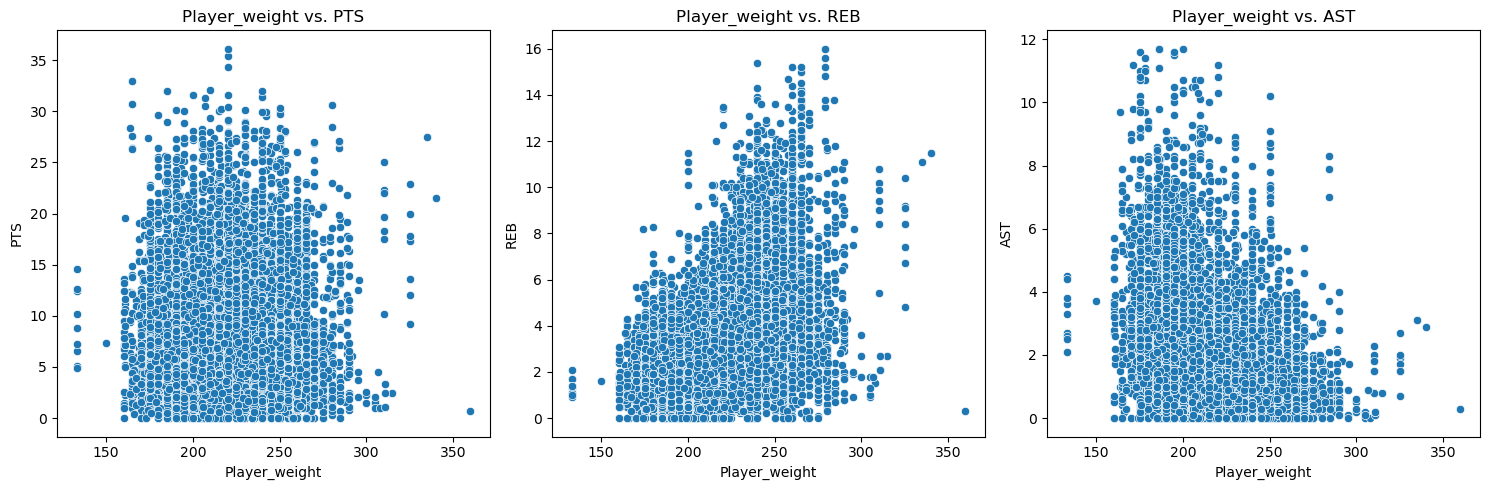

                    PTS       REB       AST
PTS            1.000000  0.621613  0.671327
REB            0.621613  1.000000  0.252214
AST            0.671327  0.252214  1.000000
PLAYER_WEIGHT -0.028583  0.441124 -0.365887


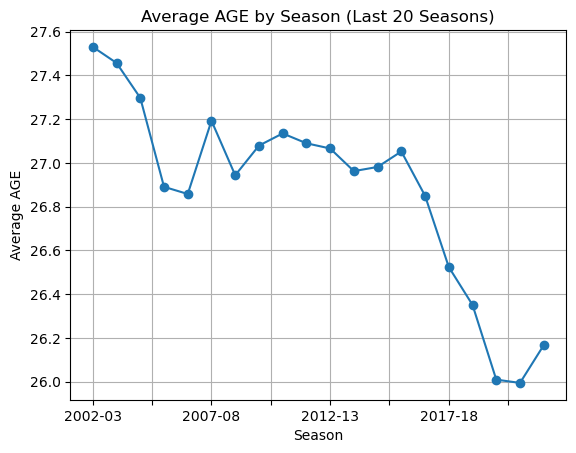

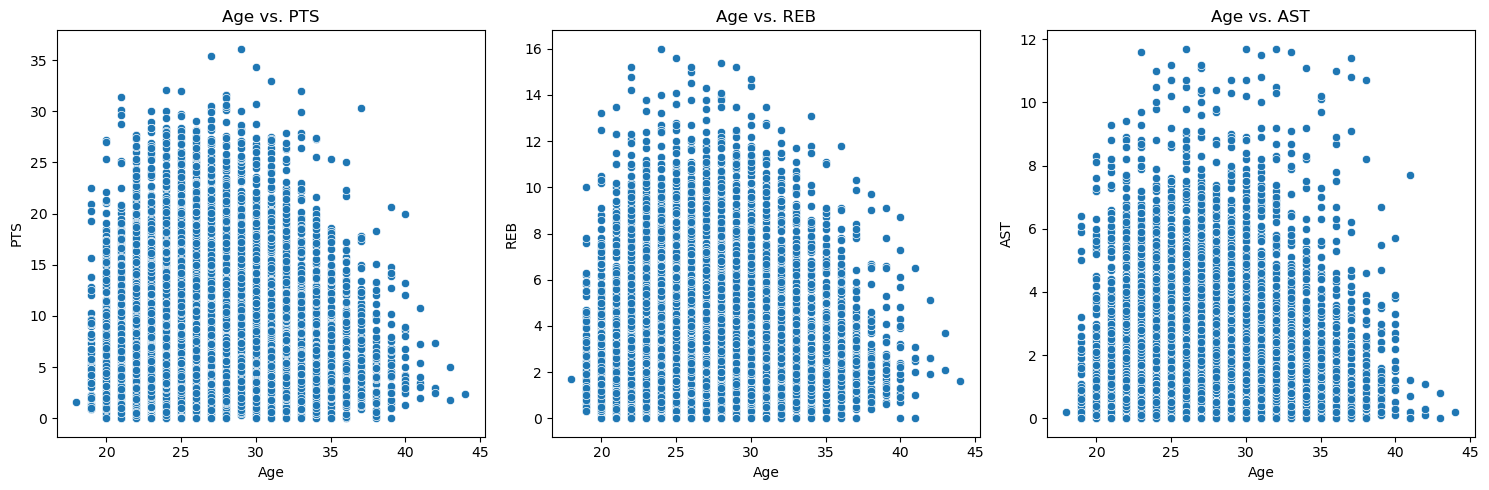

          PTS       REB       AST
PTS  1.000000  0.621820  0.671418
REB  0.621820  1.000000  0.252450
AST  0.671418  0.252450  1.000000
AGE  0.019635  0.033556  0.098913


In [ ]:
def analyze_player_attribute(dataframe, attribute, num_seasons=10):
    """
    Analyzes a specified attribute (e.g., height, age, weight) of players over seasons.
    
    :param dataframe: Pandas DataFrame containing player bio data.
    :param attribute: The player attribute to analyze ('PLAYER_HEIGHT_INCHES', 'AGE', 'PLAYER_WEIGHT').
    :param num_seasons: Number of recent seasons to include in the trend analysis.
    """
    # Filter out zeros for age and player weight
    filtered_df = dataframe[(dataframe[attribute].notna() & dataframe[attribute] > 0)]
    
    # Calculate Average Attribute by Season
    average_attribute_by_season = filtered_df.groupby('Season')[attribute].mean()
    
    # Plotting average attribute trend over the specified number of seasons
    if num_seasons > 0:
        average_attribute_by_season.tail(num_seasons).plot(kind='line', marker='o')
        plt.title(f'Average {attribute} by Season (Last {num_seasons} Seasons)')
        plt.xlabel('Season')
        plt.ylabel(f'Average {attribute}')
        plt.grid(True)
        plt.show()

def analyze_player_attribute_performance(dataframe, attributein):
    attributes = ['PTS', 'REB', 'AST']

    # Filter out zeros for age and player weight
    filtered_df = dataframe[(dataframe[attributein].notna() & dataframe[attributein] > 0)]
    
    # Calculate Average Attribute by Season
    average_attribute_by_season = dataframe.groupby('Season')[attributes].mean()

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, attribute in enumerate(attributes):
        sns.scatterplot(data=filtered_df, x=attributein, y=attribute, ax=axs[i])
        axs[i].set_title(f'{attributein.capitalize()} vs. {attribute}')
        axs[i].set_xlabel(attributein.capitalize())
        axs[i].set_ylabel(attribute)

    plt.tight_layout()
    plt.show()

    # Calculating correlation coefficients
    correlations = filtered_df[attributes + [attributein]].corr()
    print(correlations[attributes])

player_bio_data_df['PLAYER_WEIGHT'] = pd.to_numeric(player_bio_data_df['PLAYER_WEIGHT'], 'coerce')
analyze_player_attribute(player_bio_data_df, 'PLAYER_HEIGHT_INCHES', 20)
analyze_player_attribute_performance(player_bio_data_df, 'PLAYER_HEIGHT_INCHES')
analyze_player_attribute(player_bio_data_df, 'PLAYER_WEIGHT', 20)
analyze_player_attribute_performance(player_bio_data_df, 'PLAYER_WEIGHT')
analyze_player_attribute(player_bio_data_df, 'AGE', 20)
analyze_player_attribute_performance(player_bio_data_df, 'AGE')


## Question 3

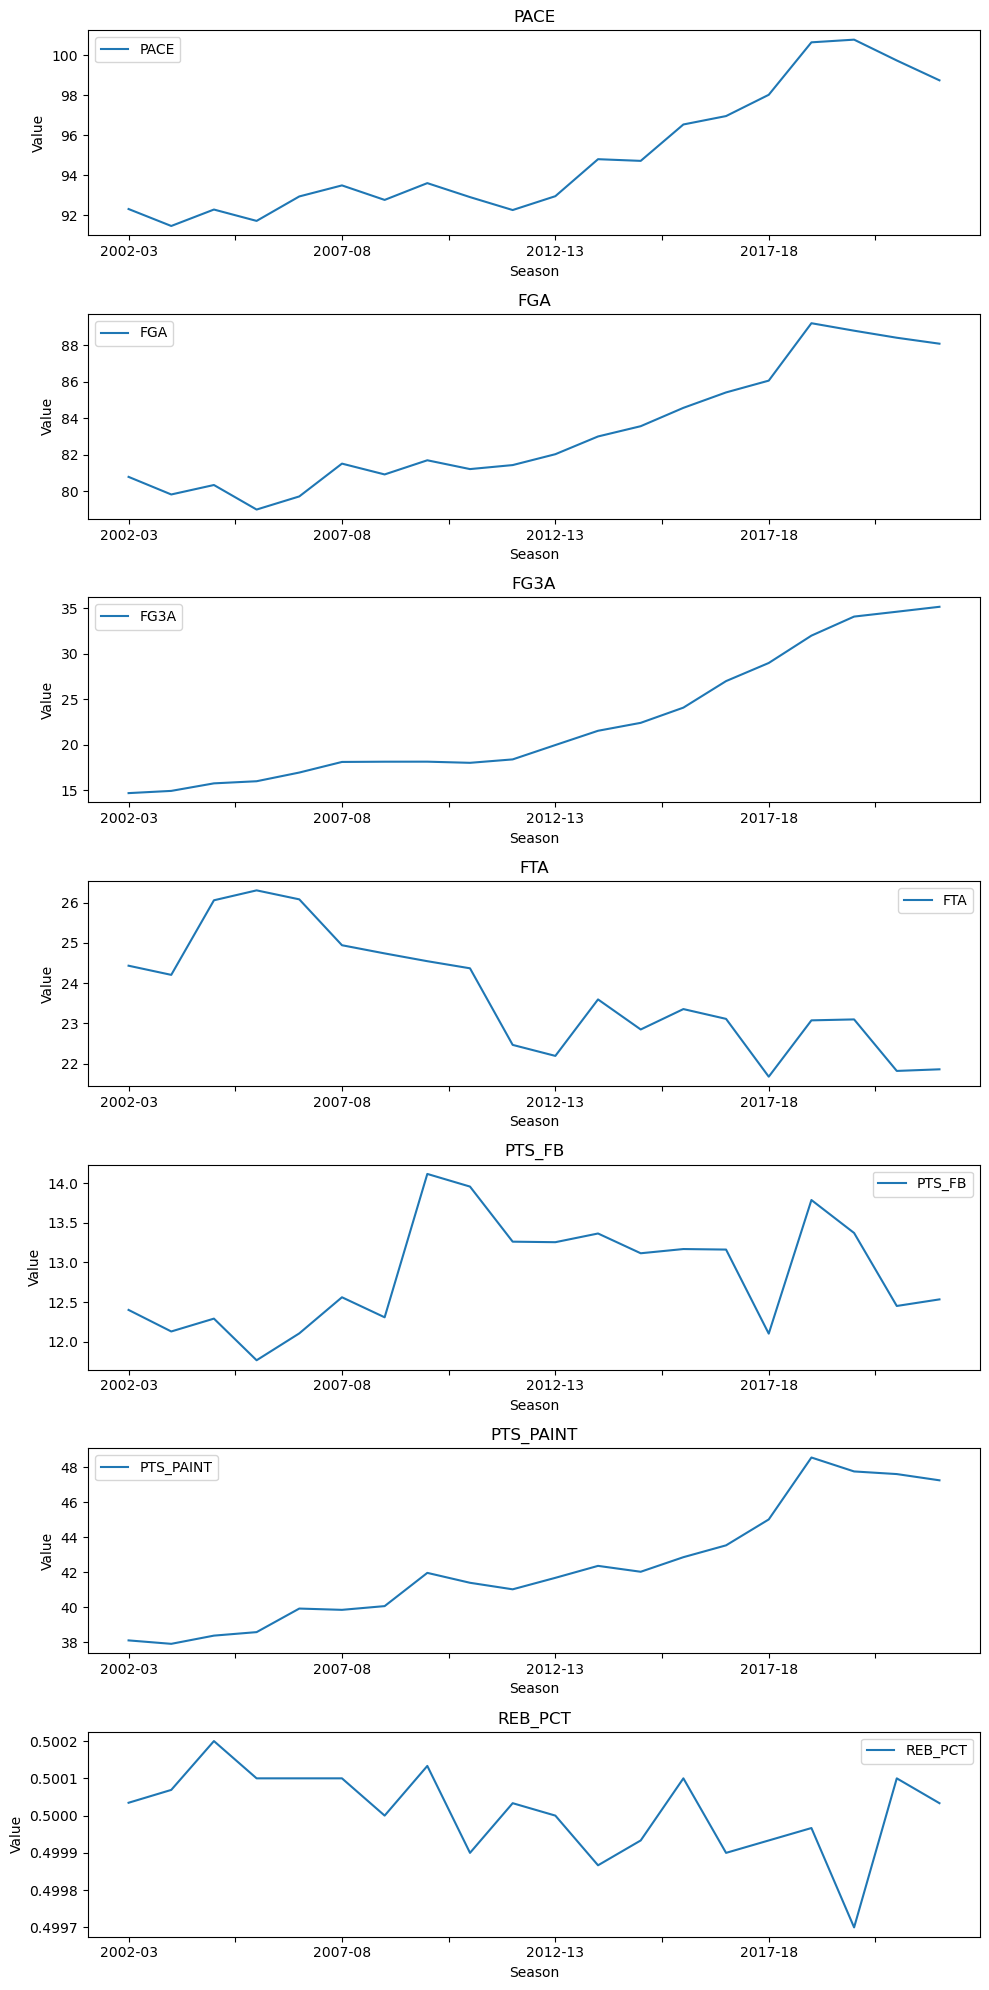

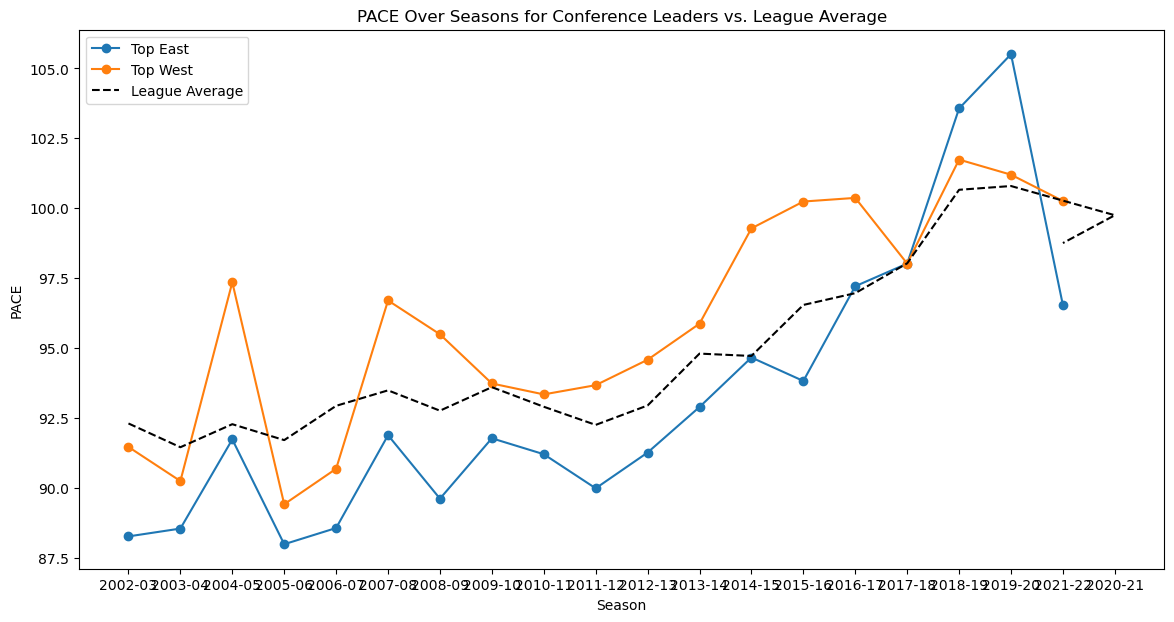

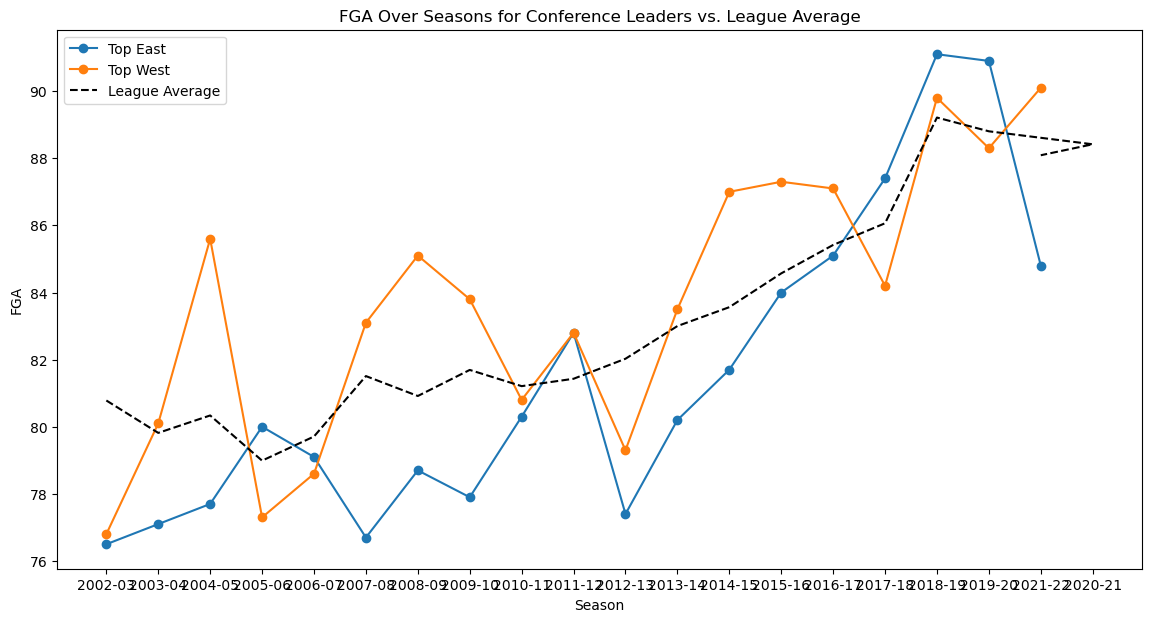

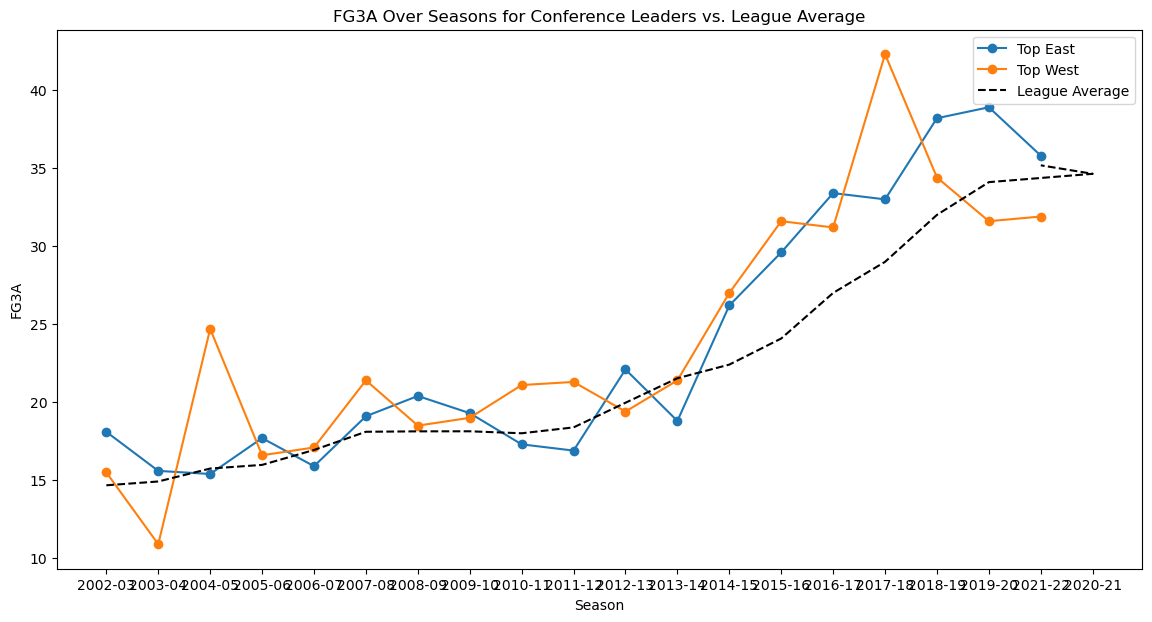

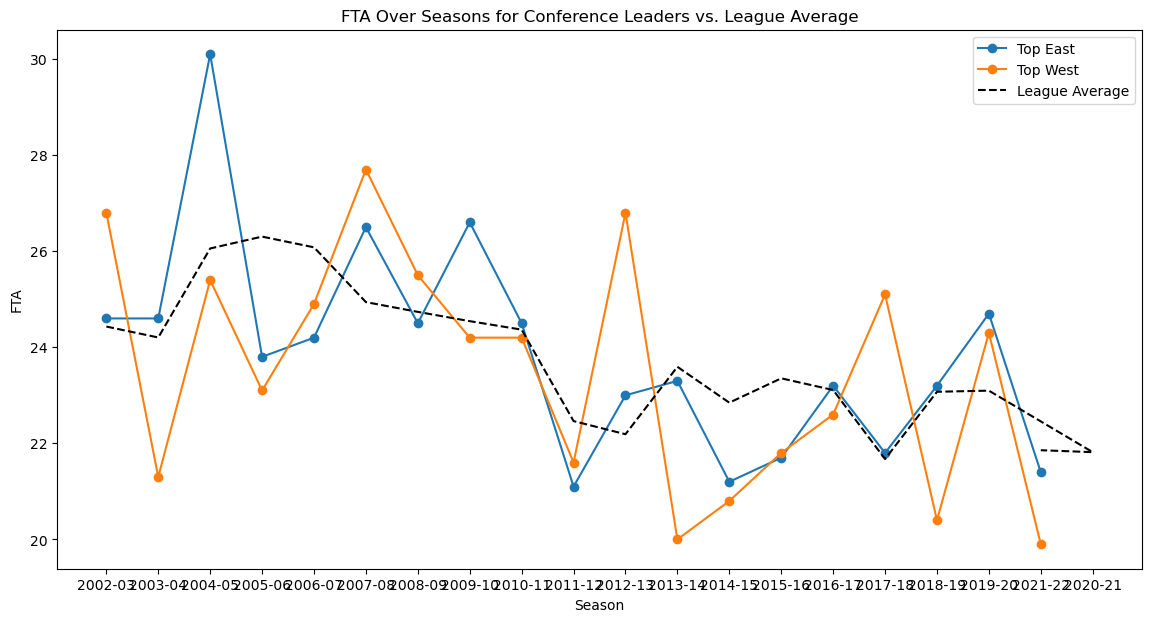

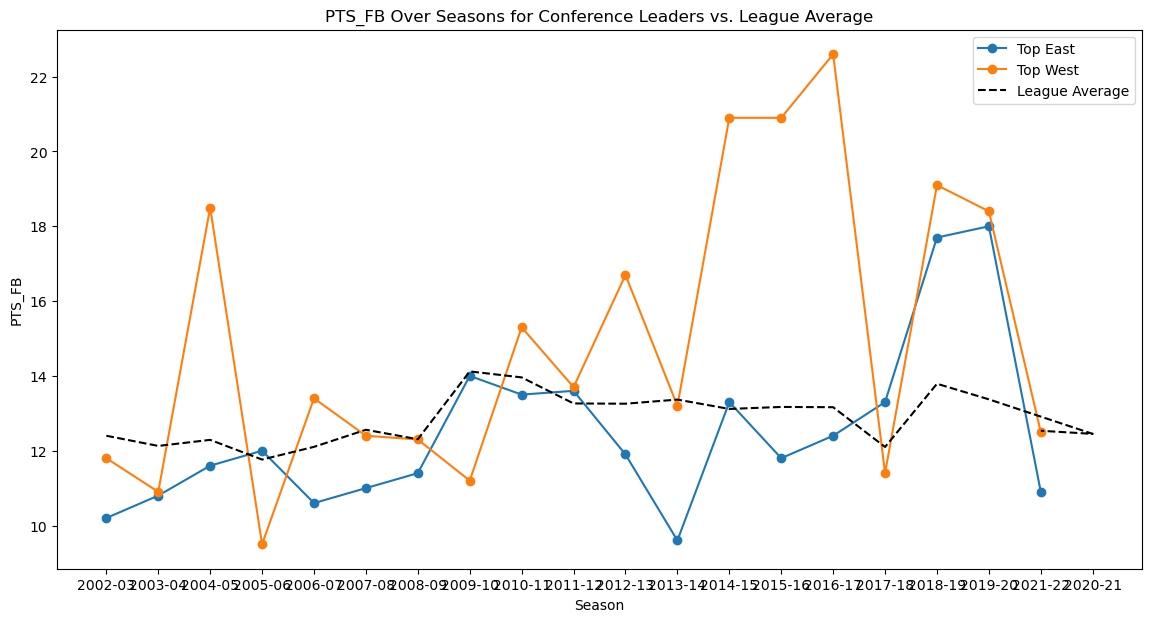

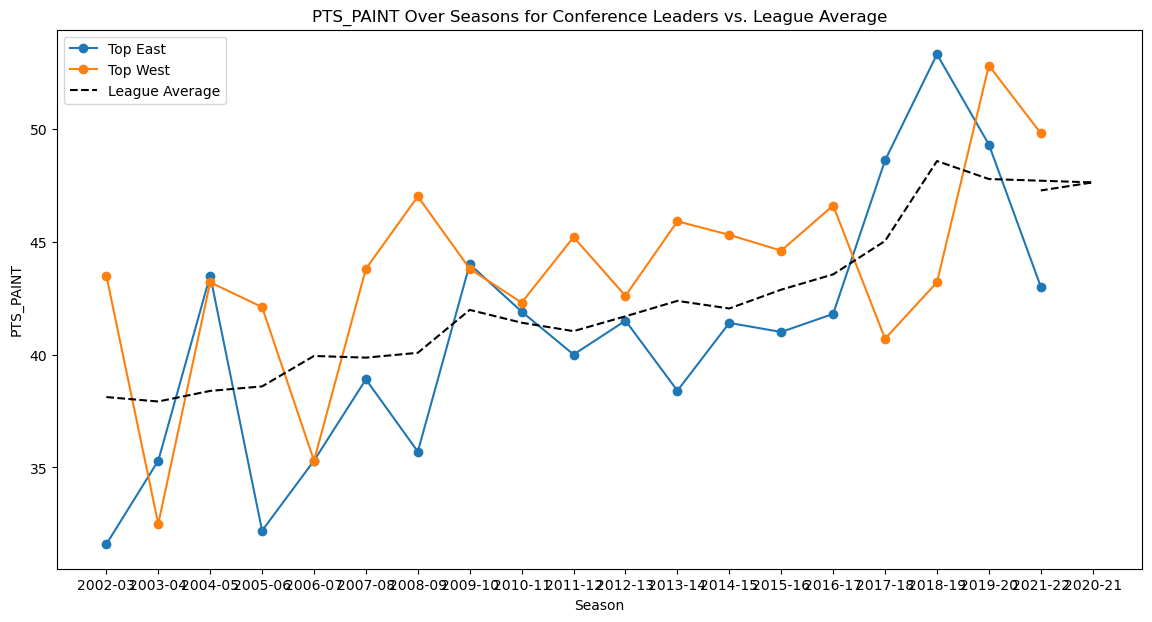

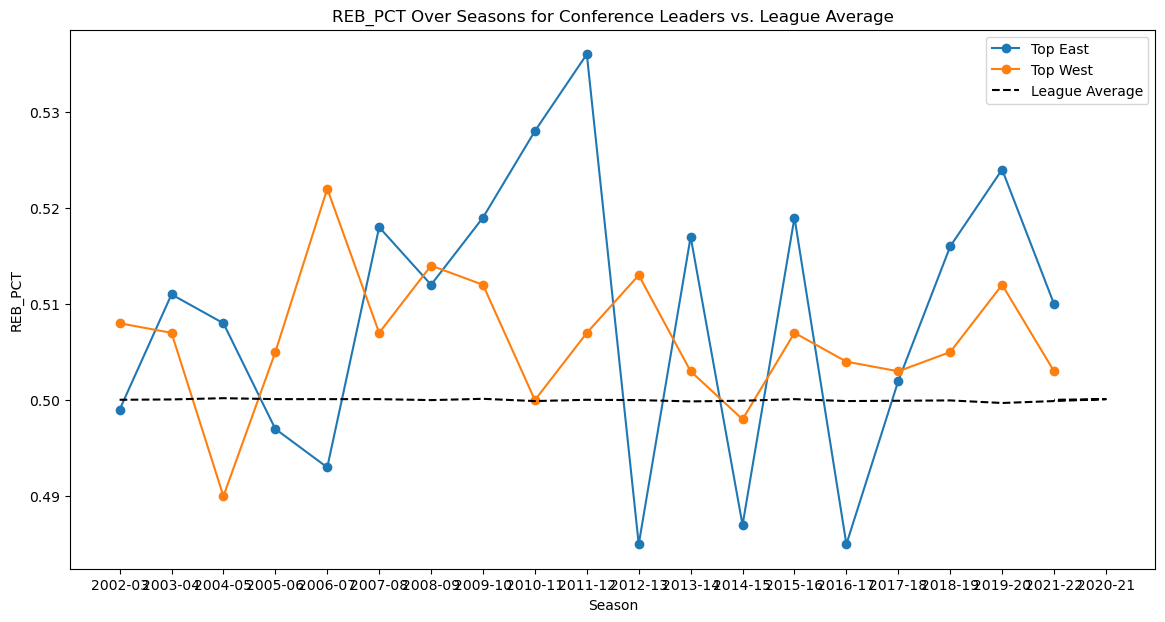

In [ ]:

merged_df = pd.merge(team_adv_data_df, team_base_data_df, on=['Season', 'TEAM_ID'], how='outer')
final_merged_df = pd.merge(merged_df, team_misc_data_df, on=['Season', 'TEAM_ID'], how='outer')

# Calculating league-wide averages for each season
average_stats_by_season = final_merged_df.groupby('Season')[['PACE', 'FGA', 'FG3A', 'FTA', 'PTS_FB', 'PTS_PAINT', 'REB_PCT']].mean().reset_index()

# Set 'Season' as the index for easier plotting
average_stats_by_season.set_index('Season', inplace=True)

# List of metrics to plot
metrics = ['PACE', 'FGA', 'FG3A', 'FTA', 'PTS_FB', 'PTS_PAINT', 'REB_PCT']

# Create subplots
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 20))

# Loop through the metrics and create a line plot for each one
for i, metric in enumerate(metrics):
    average_stats_by_season[metric].plot(ax=axs[i], legend=True)
    axs[i].set_title(metric)
    axs[i].set_xlabel('Season')
    # Assuming all values are numeric and comparable, set a ylabel. Adjust if the units differ significantly.
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


# Merging the team attribute and team rank datasets on 'TEAM_ID' and 'Season'
df_merged = pd.merge(final_merged_df, team_rank_df, on=['TEAM_ID', 'Season'], how='inner')

# 'Playoff Rank' is the rank within the conference and 'Conference' is 'East' or 'West'
top_teams_df = df_merged[(df_merged['PlayoffRank'] == 1)]

league_averages = df_merged.groupby('Season')[['PACE', 'FGA', 'FG3A', 'FTA', 'PTS_FB', 'PTS_PAINT', 'REB_PCT']].mean().reset_index()

for metric in metrics:
    plt.figure(figsize=(14, 7))
    
    # Plotting for top teams
    for conference in ['East', 'West']:
        conference_top_teams = top_teams_df[top_teams_df['Conference'] == conference]
        plt.plot(conference_top_teams['Season'], conference_top_teams[metric], marker='o', linestyle='-', label=f'Top {conference}')
    
    # Plotting league averages
    plt.plot(league_averages['Season'], league_averages[metric], color='black', linestyle='--', label='League Average')
    
    plt.title(f'{metric} Over Seasons for Conference Leaders vs. League Average')
    plt.xlabel('Season')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
